In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

We want to read in the CSV file.

In [2]:
weather = pd.read_csv("KNYC.csv")

In [6]:
weather.head()

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
0  2014-7-1                81               72               89   
1  2014-7-2                82               72               91   
2  2014-7-3                78               69               87   
3  2014-7-4                70               65               74   
4  2014-7-5                72               63               81   

   average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
0                68                83               52              100   
1                68                83               56              100   
2                68                83               54              103   
3                68                84               55              102   
4                68                84               53              101   

   record_min_temp_year  record_max_temp_year  actual_precipitation  \
0                  1943                  1901                  0.00   
1                  2001                  1966                  0.96   
2                  1933                  1966                  1.78   
3                  1986                  1949                  0.14   
4                  1979                  1999                  0.00   

   average_precipitation  record_precipitation  
0                   0.12                  2.17  
1                   0.13                  1.79  
2                   0.12                  2.80  
3                   0.13                  1.76  
4                   0.12                  3.07

In [7]:
weather.dtypes

date                      object
actual_mean_temp           int64
actual_min_temp            int64
actual_max_temp            int64
average_min_temp           int64
average_max_temp           int64
record_min_temp            int64
record_max_temp            int64
record_min_temp_year       int64
record_max_temp_year       int64
actual_precipitation     float64
average_precipitation    float64
record_precipitation     float64
dtype: object

In [8]:
weather["date"] = pd.to_datetime(weather["date"]) 

In [9]:
weather.dtypes

date                     datetime64[ns]
actual_mean_temp                  int64
actual_min_temp                   int64
actual_max_temp                   int64
average_min_temp                  int64
average_max_temp                  int64
record_min_temp                   int64
record_max_temp                   int64
record_min_temp_year              int64
record_max_temp_year              int64
actual_precipitation            float64
average_precipitation           float64
record_precipitation            float64
dtype: object

It looks like we have a year's worth of weather data from July 1, 2014 to June 30, 2015.  See if there is any missing data.

In [10]:
weather.describe()

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count        365.000000       365.000000       365.000000        365.000000   
mean          54.736986        47.246575        61.734247         48.016438   
std           18.679979        18.277156        19.446971         14.749176   
min           11.000000         2.000000        19.000000         27.000000   
25%           39.000000        34.000000        44.000000         34.000000   
50%           58.000000        50.000000        65.000000         48.000000   
75%           72.000000        64.000000        80.000000         63.000000   
max           85.000000        77.000000        92.000000         69.000000   

       average_max_temp  record_min_temp  record_max_temp  \
count        365.000000       365.000000       365.000000   
mean          62.079452        28.243836        83.731507   
std           16.068765        20.729107        13.351306   
min           38.000000       -15.000000        54.000000   
25%           47.000000         8.000000        71.000000   
50%           63.000000        31.000000        87.000000   
75%           78.000000        47.000000        96.000000   
max           84.000000        59.000000       106.000000   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count            365.000000            365.000000            365.000000   
mean            1924.079452           1958.923288              0.126164   
std               38.000820             34.824357              0.325577   
min             1871.000000           1876.000000              0.000000   
25%             1888.000000           1933.000000              0.000000   
50%             1920.000000           1962.000000              0.000000   
75%             1954.000000           1990.000000              0.050000   
max             2015.000000           2013.000000              2.540000   

       average_precipitation  record_precipitation  
count             365.000000            365.000000  
mean                0.136822              2.386137  
std                 0.015734              1.045702  
min                 0.100000              0.860000  
25%                 0.130000              1.690000  
50%                 0.140000              2.160000  
75%                 0.150000              2.750000  
max                 0.170000              8.280000

Looking at the `count` row, we see there is no missing data.  `desribe()` also gives us the 5-number summary (min, 25 percentile, 50 percentile, 75 percentile, and max) for each numerical column, as well as the mean and standard deviation.

Next, let's make some plots.  A line plot of the daily mean temperature.

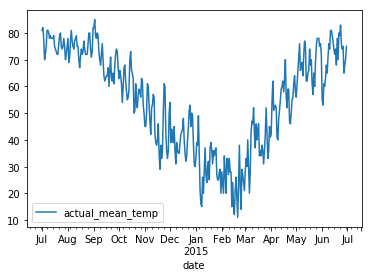

In [11]:
weather.plot(x="date",y = "actual_mean_temp")

Remember, our plots should always have a title and axis labels.  

Text(0,0.5,'Average Temperature (F)')

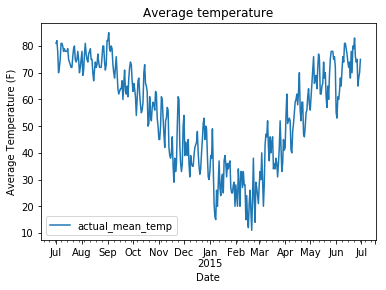

In [12]:
weather.plot(x="date",y = "actual_mean_temp")
plt.title("Average temperature")
plt.xlabel("Date")
plt.ylabel("Average Temperature (F)")

Suppose we want to look at the distribution of one of the columns.  We can make a histogram.

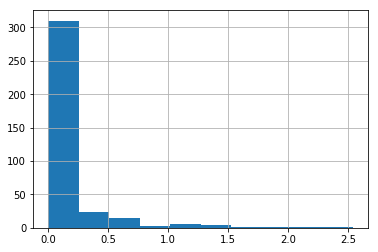

In [14]:
weather["actual_precipitation"].hist()

Sometimes it is helpful to have a finer breakdown of bins.  Also let's add a title and axis labels.

Text(0,0.5,'Frequency')

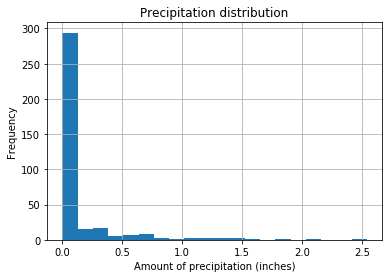

In [17]:
weather["actual_precipitation"].hist(bins = 20)
plt.title("Precipitation distribution")
plt.xlabel("Amount of precipitation (inches)")
plt.ylabel('Frequency')

We might also want to compare two columns using a *scatterplot*.  We can make a scatterplot of all possible pairs using the Seaborn package.

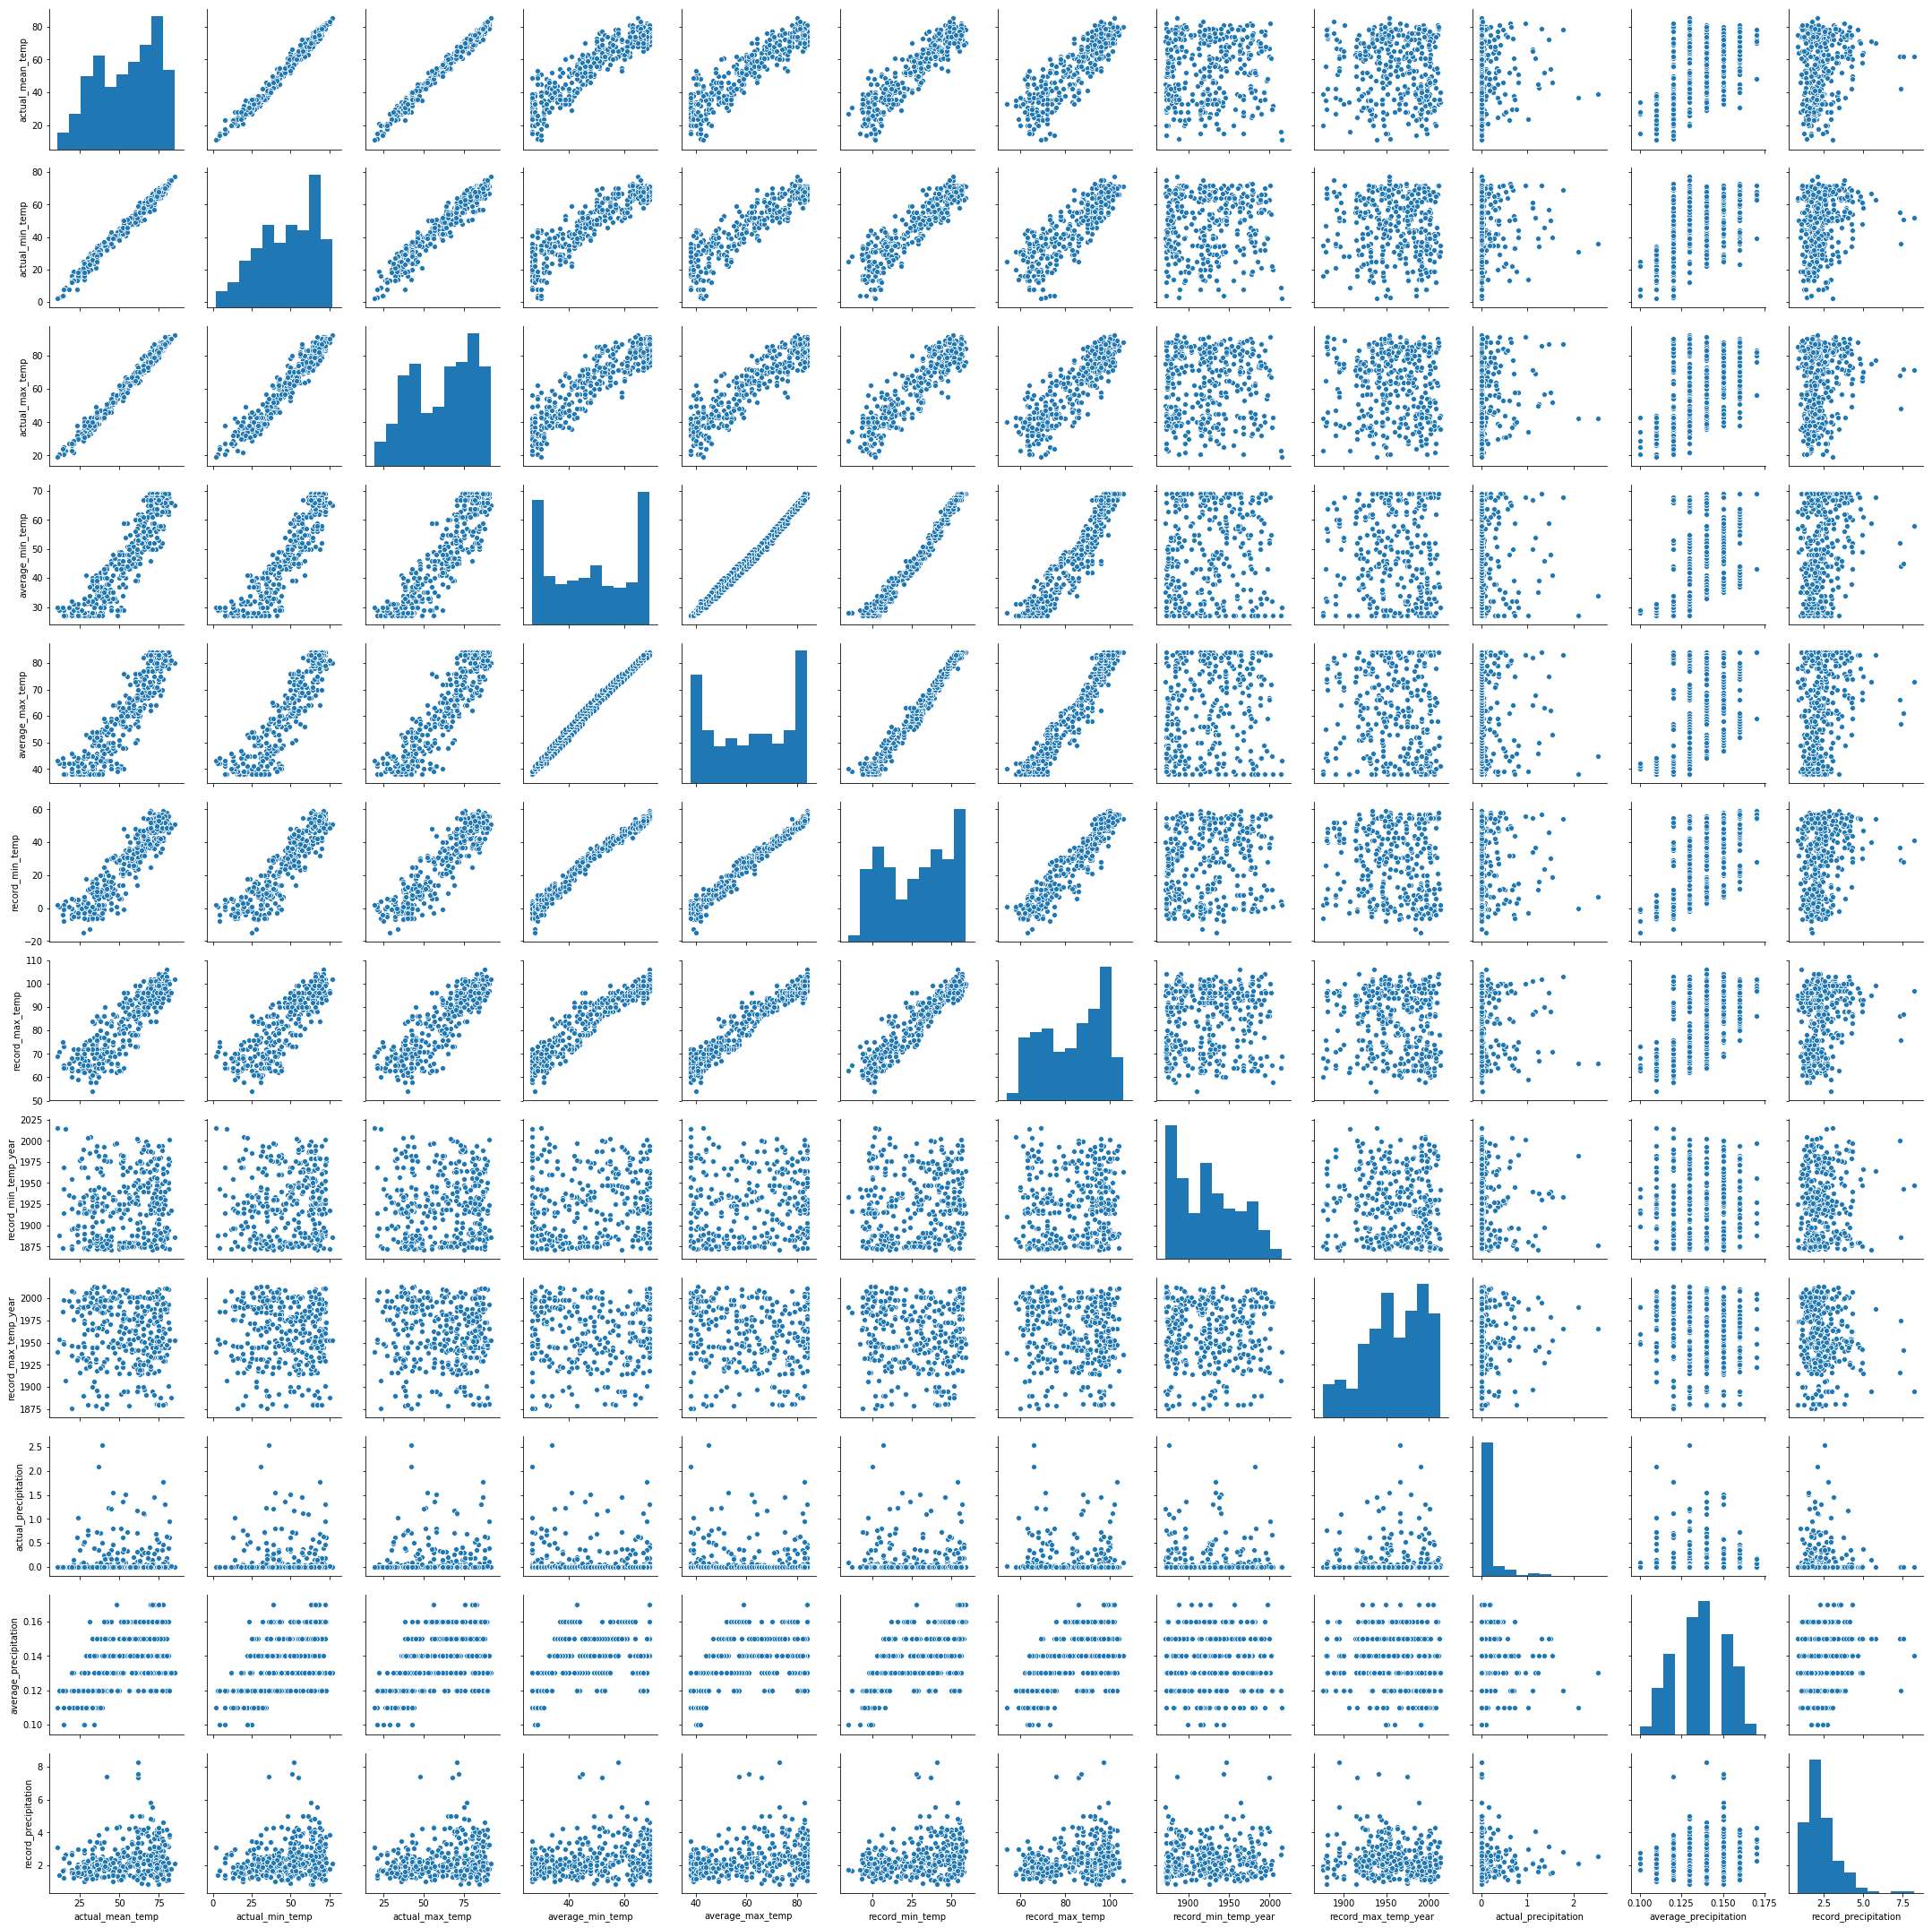

In [21]:
sns.pairplot(weather)

Or we can just make a single scatterplot.

Text(0,0.5,'Amount of precipitation (inches)')

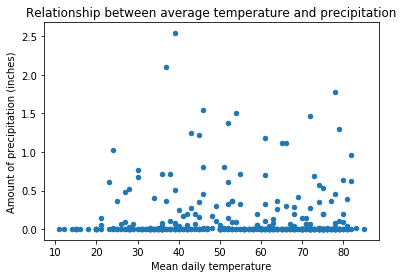

In [20]:
weather.plot.scatter(x = "actual_mean_temp", y ="actual_precipitation")
plt.title("Relationship between average temperature and precipitation")
plt.xlabel("Mean daily temperature")
plt.ylabel("Amount of precipitation (inches)")

What about if we only want data for part of the year?  Then we need to *filter* our dataset.

Let's find the distribution of daily temperatures in September.

In [25]:
sept_filter = weather["date"].dt.month == 9

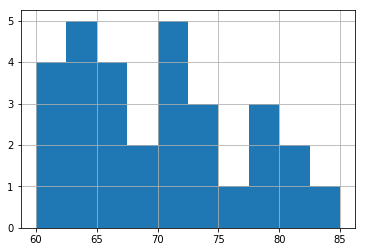

In [27]:
weather[sept_filter]["actual_mean_temp"].hist()

See https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components for the different properties that can be used after dt.  For example to get the mean min temperatures on all Tuesdays:

In [29]:
tues_filter = weather["date"].dt.weekday == 1
weather[tues_filter]["actual_min_temp"].mean()

49.22641509433962